Hello, I am Ihsan.<br>
I graduated from university this year. I improve myself on the topic of machine learning and Data science. This notebook is my third notebook and I will continue to write notebook this topics. I will use the regression models of the supervised part from machine learning in this notebook. My goal is to learn to use regression models on datasets. I used five regression models. I explained regression models shortly but If I have a mistake Please warn me in the comment. Your comments important for me because I am learning newly, I can be don't know things. I would be happy if you help me on this way. I will be waiting for your advice.<br>
[For a detailed description of the dataset, please click here](https://www.kaggle.com/datasets/andonians/random-linear-regression)

Other My notebooks:<br>
- [GPU Search](https://www.kaggle.com/code/ihsncnkz/gpu-search)
- [EDA And Linear Regression](https://www.kaggle.com/code/ihsncnkz/eda-and-linear-regression)



# Content
- [Data Review](#1)
    - [DataTrain Review](#E1)
    - [DataTest Review](#E2)
- [Visualization](#2)
- [Regression](#3)
    - [Linear Regression](#R1)
    - [Decision Tree Regression](#R2)
    - [Random Forest Regression](#R3)
    - [Evaluvation Regression Model](#R4)
    - [Polinomial Linear Regression](#R5)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/random-linear-regression/train.csv
/kaggle/input/random-linear-regression/test.csv


# Dataset Review (EDA) <a id = '1'></a>

In this notebook, I didn't have to did to the data review parth but I want to see the properties of data. If I know properties of data, I can know  use to which machine learning models and use which visualization code. In this part, I will analyze two columns. These two columns are data train and data test. Data train and Data test have the same column names. These names are x and y. The name of the x column is x and the name of the y column is y.

In [2]:
# Reading Date with Pandas Libs.
DataTrain = pd.read_csv("/kaggle/input/random-linear-regression/train.csv")
DataTest = pd.read_csv("/kaggle/input/random-linear-regression/test.csv")

## DataTrain Review <a id = "E1"></a>
In this chapter, I will analyze the DataTrain. I will look properties of the DataTrain.

In [3]:
# Firstly I will look data of DataTrain.
# Data of DataTrain 
DataTrain

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [4]:
# I will look top ten data of DataTrain.
# DataTrain Top Ten Values
DataTrain.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


This part is very important because You should know types of data values. Maybe This types can be a string and I don't want it to be a string. If The type is a string, I can get an error.

In [5]:
# İnformation of DataTrain
DataTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [6]:
# Dataset Values(Max, min, std...)
DataTrain.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


I want to apply Regression models of Machine Learning and I should know data correlation. Data Correlation shows the relationship between data. I will explain this relationship.

In [7]:
# Dataset Correlation: Relationship between columns
DataTrain.corr()

,x,y
x,1.00000,0.99534
y,0.99534,1.00000


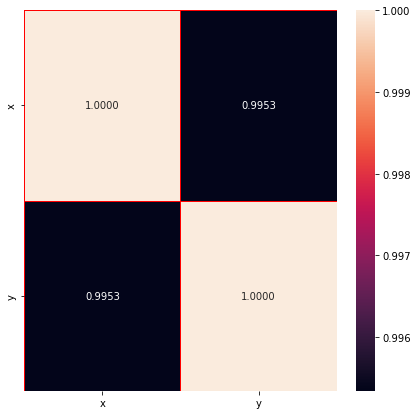

In [8]:
# Visualization of correlation results with seaborn library heatmap.
f,ax=plt.subplots(figsize=(7,7))
sns.heatmap(DataTrain.corr(),annot=True,linewidths=0.5,linecolor="red",fmt=".4f",ax=ax)
plt.show()

<Figure size 720x720 with 0 Axes>

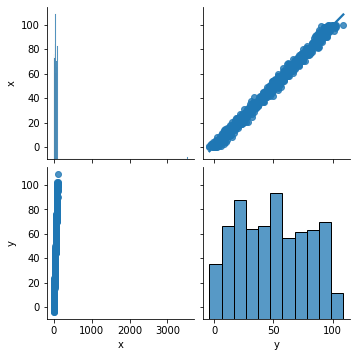

In [9]:
# Visualization of correlation results with seaborn library pairplot.
plt.figure(figsize=(10,10))
sns.pairplot(DataTrain, kind="reg")
plt.show()

In [10]:
# Dataset Columns Names
DataTrain.columns

Index(['x', 'y'], dtype='object')

## DataTest Review <a id = "E2"></a>

In [11]:
# DataTrain
DataTest

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
...,...,...
295,71,68.545888
296,46,47.334876
297,55,54.090637
298,62,63.297171


In [12]:
# DataTest Top Ten Values
DataTest.head(10)

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
5,15,9.805235
6,62,58.874659
7,95,97.617937
8,20,18.395127
9,5,8.746748


In [13]:
# İnformation of DataTest
DataTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    int64  
 1   y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


In [14]:
# Dataset Values(Max, min, std...)
DataTest.describe()

,x,y
count,300.000000,300.000000
mean,50.936667,51.205051
std,28.504286,29.071481
min,0.000000,-3.467884
25%,27.000000,25.676502
50%,53.000000,52.170557
75%,73.000000,74.303007
max,100.000000,105.591837


In [15]:
# Dataset Correlation: Relationship between columns
DataTest.corr()

,x,y
x,1.000000,0.994545
y,0.994545,1.000000


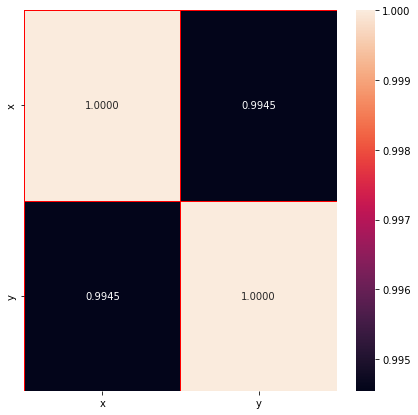

In [16]:
# Visualization of correlation results with seaborn library heatmap.
f,ax=plt.subplots(figsize=(7,7))
sns.heatmap(DataTest.corr(),annot=True,linewidths=0.5,linecolor="red",fmt=".4f",ax=ax)
plt.show()

<Figure size 720x720 with 0 Axes>

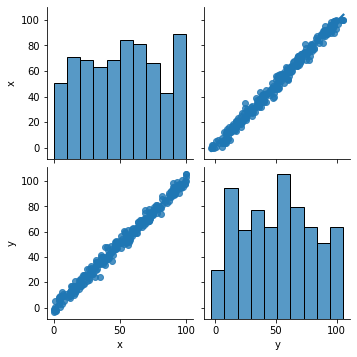

In [17]:
# Visualization of correlation results with seaborn library pairplot.
plt.figure(figsize=(10,10))
sns.pairplot(DataTest, kind="reg")
plt.show()

In [18]:
# Dataset Columns Names
DataTest.columns

Index(['x', 'y'], dtype='object')

## End Data Review
I finished the data review. The reason I'm doing this is to get an overview of the dataset and get to the idea. 

# Visualization <a id = "2"></a>
I will visualise DataTrain and DataTest. I will use the matplotlib library for visualization. 

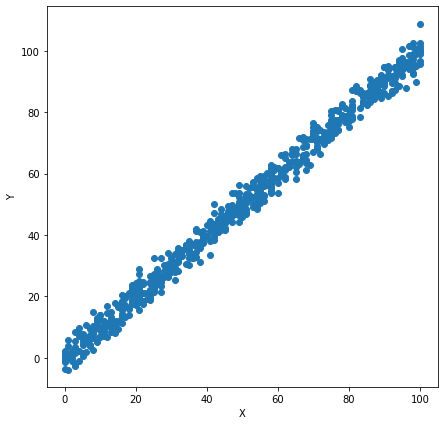

In [19]:
# I am visualizing the DataTrain columns. I am visualizing the relationship between the x and y columns.
x = DataTrain["x"]
y = DataTrain["y"]
#Graph
plt.figure(figsize=[7,7]) 
plt.scatter(x=x,y=y) 
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

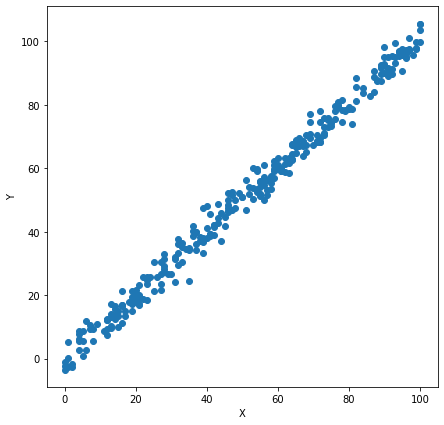

In [20]:
# I am visualizing the DataTest columns. I am visualizing the relationship between the x and y columns.
x = DataTest["x"]
y = DataTest["y"]
#Graph
plt.figure(figsize=[7,7]) 
plt.scatter(x=x,y=y) 
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Regression <a id = "3"></a>
In this part, I will apply the regression models to the dataset. I listed to will apply models. I will explain information about models at the under of the topic about the model.<br>

Models of I Will Use:
- Linear Regression
- Decision Tree Regression
- Random Forest Regression
- Evaluation Regression
- Polinomial Linear Regression

In [21]:
# I am importing models.
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures

In [22]:
# I drop nan values in DataTrain and DataTest.
DataTrain = DataTrain.dropna()
DataTest = DataTest.dropna()

In [23]:
# I specify to values of test and train.
x_train = np.array(DataTrain.loc[:,'x']).reshape(-1,1)
y_train = np.array(DataTrain.loc[:,'y']).reshape(-1,1)
x_test = np.array(DataTest.loc[:,'x']).reshape(-1,1)
y_test = np.array(DataTest.loc[:,'y']).reshape(-1,1)

# In this code, When I calculate the mean square error, I will use this code.
theta = np.matmul(np.linalg.inv( np.matmul(x_train.T, x_train)), np.matmul(x_train.T, y_train))

## Linear Regression <a id = "R1"></a>

**What is the Linear Regression?**<br>
Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable. For example, a modeler might want to relate the weights of individuals to their heights using a linear regression model.<br>
I will apply the Linear Regression model of Machine learning to this dataset and I will look result.

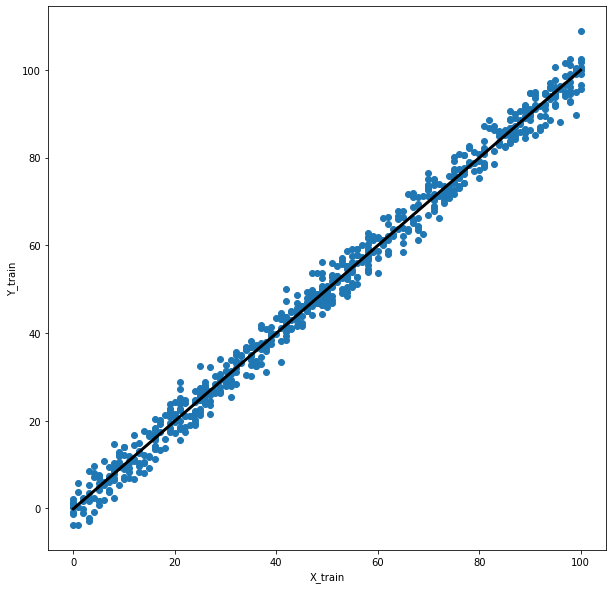

In [24]:
# Import LinearRegression
LinReg = LinearRegression()

# Training with x values and y values
LinReg.fit(x_train,y_train)

# Predict_space
# We generate numbers between the smallest and largest numbers in x data.
predic_npspace = np.linspace(min(x_test), max(x_test)).reshape(-1,1)

#Predict
# We make predictions with the random numbers we produce.
predicted = LinReg.predict(predic_npspace)

# Plot regression line and scatter
plt.figure(figsize = (10,10))
plt.plot(predic_npspace, predicted, color = "black", linewidth = 3)
plt.scatter(x = x_train, y = y_train)
plt.xlabel("X_train")
plt.ylabel("Y_train")
plt.show()


In [25]:
# I'm looking at what the desired value will return.
LinReg.predict([[45]])

array([[44.92227172]])

In [26]:
# In this part, I constitute a loop with 'for' and I look at the predic_npspace and its results.
for i in range(0,len(predic_npspace)):
    LinRegPredictResult = LinReg.predict([[predic_npspace[i][0]]])
    print("Resut: index({0}) {1} : {2}".format(i, predic_npspace[i], LinRegPredictResult))

Resut: index(0) [0.] : [[-0.10726546]]
Resut: index(1) [2.04081633] : [[1.93489042]]
Resut: index(2) [4.08163265] : [[3.9770463]]
Resut: index(3) [6.12244898] : [[6.01920218]]
Resut: index(4) [8.16326531] : [[8.06135806]]
Resut: index(5) [10.20408163] : [[10.10351394]]
Resut: index(6) [12.24489796] : [[12.14566982]]
Resut: index(7) [14.28571429] : [[14.18782571]]
Resut: index(8) [16.32653061] : [[16.22998159]]
Resut: index(9) [18.36734694] : [[18.27213747]]
Resut: index(10) [20.40816327] : [[20.31429335]]
Resut: index(11) [22.44897959] : [[22.35644923]]
Resut: index(12) [24.48979592] : [[24.39860511]]
Resut: index(13) [26.53061224] : [[26.44076099]]
Resut: index(14) [28.57142857] : [[28.48291687]]
Resut: index(15) [30.6122449] : [[30.52507276]]
Resut: index(16) [32.65306122] : [[32.56722864]]
Resut: index(17) [34.69387755] : [[34.60938452]]
Resut: index(18) [36.73469388] : [[36.6515404]]
Resut: index(19) [38.7755102] : [[38.69369628]]
Resut: index(20) [40.81632653] : [[40.73585216]]
Re

In the two codes below, I looked mean square error and r square. First code, I didn't use another model for the calculation error. I calculated MSE and R_square without a model. Second code, I use the mean_squared_error model for the calculation error.

In [27]:
# Normal equation
y_Norm = np.matmul(x_test, theta)

# Evaluvation: MSE
MSE = np.sum((y_Norm - y_test)**2)/ x_test.shape[0]

# R_square
sse = np.sum((y_Norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)

print("The Mean Square Error(MSE) or j(thate) is: ",MSE)
print("R square obtain for normal equation method is: ",R_square)

The Mean Square Error(MSE) or j(thate) is:  9.453863678379564
R square obtain for normal equation method is:  0.9887765831656253


In [28]:
# sklearn regression module
X_pred = LinReg.predict(x_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
Sk_mean = mean_squared_error(X_pred, y_test)

# R_square
R_square_sk = LinReg.score(x_test,y_test)
print("The Mean Square Error(MSE) or j(thate) is: ",Sk_mean)
print("R square obtain for normal equation method is: ",R_square_sk)

The Mean Square Error(MSE) or j(thate) is:  9.432922192039305
R square obtain for normal equation method is:  0.9888014444327563


## Decision Tree Regression <a id = "R2"></a>

**What is the Decision Tree Regression?**
<p>Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.</p>
In this part, I will apply the Decision Tree Regression model of Machine Learning to the dataset and I will look result.


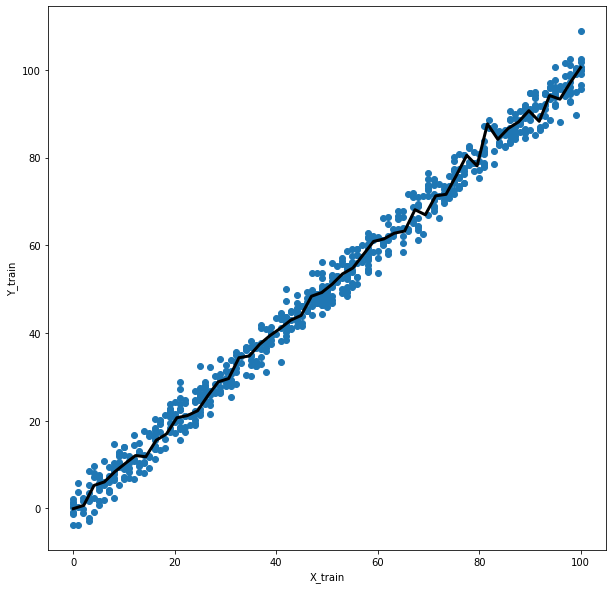

In [29]:
# Import DecisionTreeRegressor
DesTreeReg = DecisionTreeRegressor()

# Training with x values and y values
DesTreeReg.fit(x_train,y_train)

# Predict_space
# We generate numbers between the smallest and largest numbers in x data.
predic_npspace_Des = np.linspace(min(x_test), max(x_test)).reshape(-1,1)

#Predict
# We make predictions with the random numbers we produce.
predicted_Des = DesTreeReg.predict(predic_npspace_Des)

# Plot regression line and scatter
plt.figure(figsize = (10,10))
plt.plot(predic_npspace_Des, predicted_Des, color = "black", linewidth = 3)
plt.scatter(x = x_train, y = y_train)
plt.xlabel("X_train")
plt.ylabel("Y_train")
plt.show()

In this code, I use different visualization for explaining my Training result. It generally used this visualization.

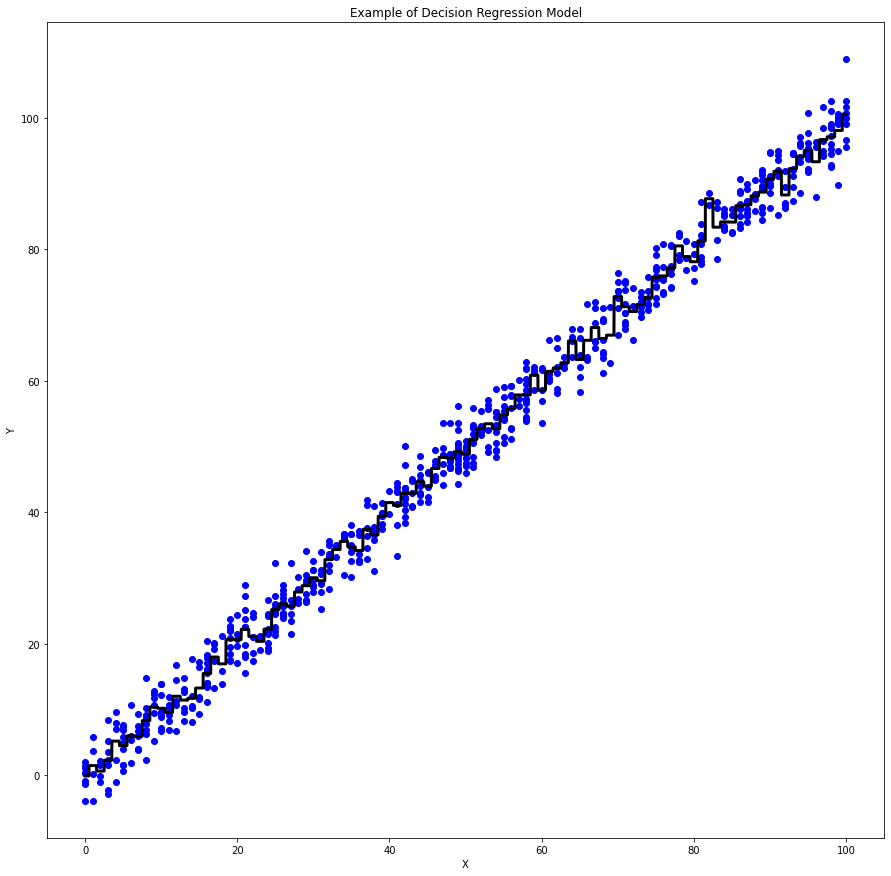

In [30]:
# This code generates the numbers.
X_grid = np.arange(min(x_train), max(x_train), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

# Plot regression line and scatter
plt.figure(figsize=(15,15))
plt.scatter(x_train, y_train, color = 'blue')
plt.plot(X_grid, DesTreeReg.predict(X_grid), color = 'black',linewidth = 3)
plt.title('Example of Decision Regression Model')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [31]:
# sklearn regression module
X_pred = DesTreeReg.predict(x_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
Sk_mean = mean_squared_error(X_pred, y_test)

# R_square
R_square_sk = DesTreeReg.score(x_test,y_test)
print("The Mean Square Error(MSE) or j(thate) is: ",Sk_mean)
print("R square obtain for normal equation method is: ",R_square_sk)

The Mean Square Error(MSE) or j(thate) is:  10.80868185383003
R square obtain for normal equation method is:  0.9871681731403525


In [32]:
# I'm looking at what the desired value will return.
DesTreeReg.predict([[45]])

array([43.99425993])

In [33]:
# In this part, I constitute a loop with 'for' and I look at the predic_npspace and its results.
for i in range(0,len(predic_npspace_Des)):
    DesRegPredictResult = DesTreeReg.predict([[predic_npspace_Des[i][0]]])
    print("Resut: index({0}) {1} : {2}".format(i, predic_npspace_Des[i], DesRegPredictResult))

Resut: index(0) [0.] : [-0.06980565]
Resut: index(1) [2.04081633] : [0.66712693]
Resut: index(2) [4.08163265] : [5.22832367]
Resut: index(3) [6.12244898] : [6.03309923]
Resut: index(4) [8.16326531] : [8.3372265]
Resut: index(5) [10.20408163] : [10.21781999]
Resut: index(6) [12.24489796] : [12.0452178]
Resut: index(7) [14.28571429] : [11.76598606]
Resut: index(8) [16.32653061] : [15.51747963]
Resut: index(9) [18.36734694] : [16.97236932]
Resut: index(10) [20.40816327] : [20.66186837]
Resut: index(11) [22.44897959] : [21.14445594]
Resut: index(12) [24.48979592] : [22.2578069]
Resut: index(13) [26.53061224] : [25.73216068]
Resut: index(14) [28.57142857] : [28.8576974]
Resut: index(15) [30.6122449] : [29.60549843]
Resut: index(16) [32.65306122] : [34.35313444]
Resut: index(17) [34.69387755] : [34.76282206]
Resut: index(18) [36.73469388] : [37.43472891]
Resut: index(19) [38.7755102] : [39.41941617]
Resut: index(20) [40.81632653] : [41.06150075]
Resut: index(21) [42.85714286] : [42.92018165]

## Random Forest Regression <a id = "R3"></a>

**What is the Random Forest Regression?**
<p>Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. Ensemble learning method is a technique that combines predictions from multiple machine learning algorithms to make a more accurate prediction than a single model.</p>
In this part, I will apply the Random Forest Regression model of Machine Learning to the dataset and I will look result.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


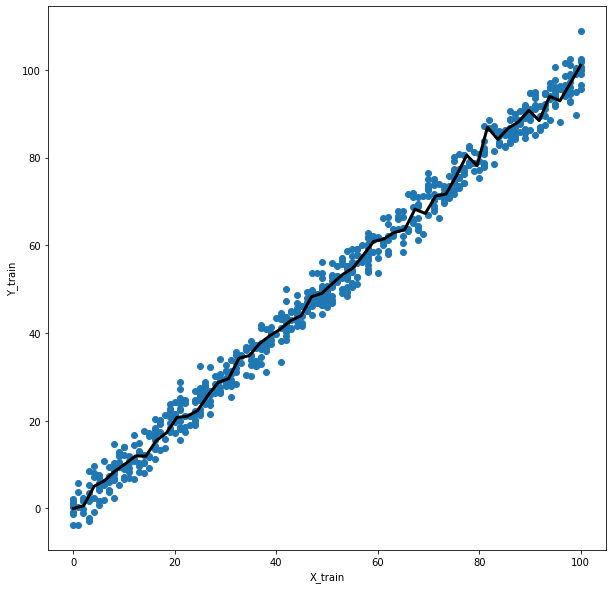

In [34]:
# Import RandomForestRegressor
RanReg = RandomForestRegressor(n_estimators= 100, random_state=42)

# Training with x values and y values
RanReg.fit(x_train, y_train)

# Predict_space
# We generate numbers between the smallest and largest numbers in x data.
predic_npspace_Ran = np.linspace(min(x_test), max(x_test)).reshape(-1,1)

#Predict
# We make predictions with the random numbers we produce.
predicted_Ran = RanReg.predict(predic_npspace_Ran)


# Plot regression line and scatter
plt.figure(figsize = (10,10))
plt.plot(predic_npspace_Ran, predicted_Ran, color = "black", linewidth = 3)
plt.scatter(x = x_train, y = y_train)
plt.xlabel("X_train")
plt.ylabel("Y_train")
plt.show()

In [35]:
# sklearn regression module
X_pred = RanReg.predict(x_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
Sk_mean = mean_squared_error(X_pred, y_test)

# R_square
y_pred = RanReg.predict(y_train)

# Evaluvation Regression Model
from sklearn.metrics import r2_score
r2_score_ran = r2_score(y_train,y_pred) 

R_square_sk = RanReg.score(x_test,y_test)
print("The Mean Square Error(MSE) or j(thate) is: ",Sk_mean)
print("R square obtain for normal equation method is: ",R_square_sk)
print("Evaluate Regression Models is: ", r2_score_ran)

The Mean Square Error(MSE) or j(thate) is:  10.785591536566352
R square obtain for normal equation method is:  0.9871955854517952
Evaluate Regression Models is:  0.9981961711998867


In [36]:
# I'm looking at what the desired value will return.
RanReg.predict([[45]])

array([43.94267404])

In [37]:
# In this part, I constitute a loop with 'for' and I look at the predic_npspace and its results.
for i in range(0,len(predic_npspace_Ran)):
    RanRegPredictResult = DesTreeReg.predict([[predic_npspace_Ran[i][0]]])
    print("Resut: index({0}) {1} : {2}".format(i, predic_npspace_Ran[i], RanRegPredictResult))

Resut: index(0) [0.] : [-0.06980565]
Resut: index(1) [2.04081633] : [0.66712693]
Resut: index(2) [4.08163265] : [5.22832367]
Resut: index(3) [6.12244898] : [6.03309923]
Resut: index(4) [8.16326531] : [8.3372265]
Resut: index(5) [10.20408163] : [10.21781999]
Resut: index(6) [12.24489796] : [12.0452178]
Resut: index(7) [14.28571429] : [11.76598606]
Resut: index(8) [16.32653061] : [15.51747963]
Resut: index(9) [18.36734694] : [16.97236932]
Resut: index(10) [20.40816327] : [20.66186837]
Resut: index(11) [22.44897959] : [21.14445594]
Resut: index(12) [24.48979592] : [22.2578069]
Resut: index(13) [26.53061224] : [25.73216068]
Resut: index(14) [28.57142857] : [28.8576974]
Resut: index(15) [30.6122449] : [29.60549843]
Resut: index(16) [32.65306122] : [34.35313444]
Resut: index(17) [34.69387755] : [34.76282206]
Resut: index(18) [36.73469388] : [37.43472891]
Resut: index(19) [38.7755102] : [39.41941617]
Resut: index(20) [40.81632653] : [41.06150075]
Resut: index(21) [42.85714286] : [42.92018165]

## Evaluation Regression Model <a id = "R4"></a>

**What is the Evaluation Regression Model?**
<p>Evaluation Regression comprises metrics of calculation error. These metrics are used to calculate calculation error. I used metrics of one in the random forest regression part and Below I specified these metrics. </p>

Metric 1:<br>
from sklearn.metrics import **-------** <br>
In the code, we use the models in the metrics section of the sklearn library to evaluate how well we train our model. <br>

example: <br>

from sklearn.metrics import **mean_squared_error** <br>
Sk_mean = mean_squared_error(X_pred, y_test)</p>

from sklearn.metrics import **r2_score** <br>
r2_score_ran = r2_score(y_train,y_pred) </p>




## Polynomial  Linear Regression <a id = "R5"></a>

**What is the Polynomial Linear Regression?** <br>
Polynomial Regression is a form of Linear regression known as a special case of Multiple linear regression which estimates the relationship as an nth degree polynomial.<br>
In this part, I will apply the Polynomial  Linear Regression model of Machine Learning to the my dataset and I will look result. I constituted a dataset for this model and I used it. I didn't use this dataset because This dataset didn't suit this model. I didn't use this dataset because This dataset didn't suit Polynomial  Linear Regression. You will see on the graph that it is not suitable.

In [38]:
# Generate Data
# This is data values
Car_price = [60,70,80,100,120,150,200,250,300,400,500,750,1000,2000,3000]
Car_Max_Speed = [180,180,200,200,200,220,240,240,300,350,350,360,365,365,365]

# I translate the array from the list.
Car_Price = np.array(Car_price)
Car_Max_Speed = np.array(Car_Max_Speed)

# I constitute the data.
Data = {'Car_price': Car_Price, 'Car_Max_Speed': Car_Max_Speed}
Data = pd.DataFrame(Data)
# I look values of data.
Data

,Car_price,Car_Max_Speed
0,60,180
1,70,180
2,80,200
3,100,200
4,120,200
5,150,220
6,200,240
7,250,240
8,300,300
9,400,350


In [39]:
# I specify to values of test and train.
x_train_newData = Data.Car_price.values.reshape(-1,1)
y_train_newData = Data.Car_Max_Speed.values.reshape(-1,1)

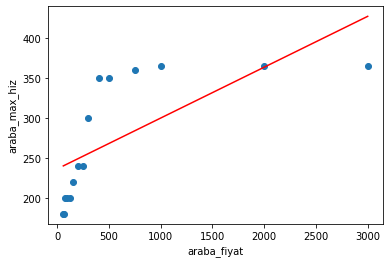

In [40]:
# Training with x values and y values. I used the Linear Regression model.
LinReg.fit(x_train_newData, y_train_newData)

# Predict with x_train_newData of value
y_head = LinReg.predict(x_train_newData)

# Plot regression line and scatter
plt.scatter(x_train_newData, y_train_newData)
plt.plot(x_train_newData, y_head, color = "red")
plt.ylabel("araba_max_hiz")
plt.xlabel("araba_fiyat")
plt.show()

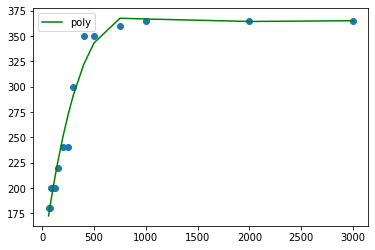

In [41]:
# Import PolynomialFeatures
pf = PolynomialFeatures(degree=4)

# transforms our numpy array x from a 1D array to a 2D array 
x_pol = pf.fit_transform(x_train_newData)

# Import LinearRegression
linear_reg2 = LinearRegression()

# Training with x_pol values and y_train_newData values
linear_reg2.fit(x_pol, y_train_newData)

# Predict with x_pol values
y_head2 = linear_reg2.predict(x_pol)

# Plot regression line and scatter
plt.scatter(x_train_newData, y_train_newData)
plt.plot(x_train_newData, y_head2, color = "green", label = "poly")
plt.legend()
plt.show()

# CONCLUSION
I am learning the English language newly if I make an errata please advise me in the comment. Thank you for reading my notebook, your votes and your comments. I will be waiting for your advice.